In [1]:
import nltk
import matplotlib.pyplot as plt
import numpy as np
from gensim.models import Word2Vec
%matplotlib inline

/usr/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
documents = [
        " I am  kushal. i live in kathmandu. i am computer engineer ",
        " i love programming. programming is life.",
        " i love games too. it's life too",
        " i love making robots"
]

In [5]:
tokens = [nltk.word_tokenize(doc) for doc in documents]
tokens

[['I',
  'am',
  'kushal',
  '.',
  'i',
  'live',
  'in',
  'kathmandu',
  '.',
  'i',
  'am',
  'computer',
  'engineer'],
 ['i', 'love', 'programming', '.', 'programming', 'is', 'life', '.'],
 ['i', 'love', 'games', 'too', '.', 'it', "'s", 'life', 'too'],
 ['i', 'love', 'making', 'robots']]

In [8]:
model = Word2Vec(tokens, min_count=1, size=2)
print(model)

Word2Vec(vocab=20, size=2, alpha=0.025)


In [10]:
words = list(model.wv.vocab) 
words

['I',
 'am',
 'kushal',
 '.',
 'i',
 'live',
 'in',
 'kathmandu',
 'computer',
 'engineer',
 'love',
 'programming',
 'is',
 'life',
 'games',
 'too',
 'it',
 "'s",
 'making',
 'robots']

In [11]:
model['kushal']

array([0.0986801 , 0.12145854], dtype=float32)

In [12]:
model['engineer']

array([0.14273243, 0.18418202], dtype=float32)

In [13]:
model.save('kushal.model')

In [20]:
model=Word2Vec.load('kushal.model')

In [25]:
model['kushal']

array([0.0986801 , 0.12145854], dtype=float32)

In [27]:
vectors = model[words]
vectors

array([[-0.06405305,  0.03483329],
       [ 0.18571202, -0.08789073],
       [ 0.0986801 ,  0.12145854],
       [-0.17997785,  0.15444364],
       [ 0.17642361, -0.15659013],
       [ 0.19604234, -0.2464999 ],
       [-0.21690035,  0.14055003],
       [-0.17185552, -0.01418673],
       [ 0.05798269,  0.14886068],
       [ 0.14273243,  0.18418202],
       [-0.16973451, -0.12156926],
       [-0.02783644, -0.20525794],
       [-0.23345275,  0.0406457 ],
       [-0.22480218,  0.17388228],
       [-0.1876317 ,  0.10015085],
       [-0.08796878,  0.19138889],
       [-0.00448904, -0.0813017 ],
       [ 0.17665957,  0.05616023],
       [ 0.21315227,  0.09638264],
       [ 0.05729757,  0.16746303]], dtype=float32)

In [30]:
x = vectors[:, 0]
y = vectors[:, 1]

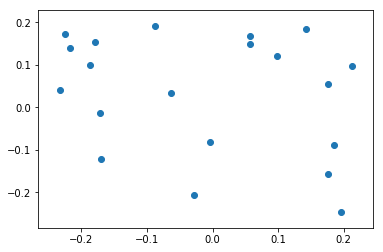

In [32]:
plt.scatter(x,y)

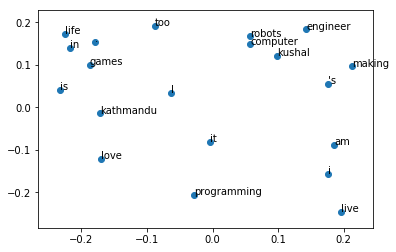

In [36]:
fig, ax = plt.subplots()
ax.scatter(x,y)

for i, txt in enumerate(words):
    ax.annotate(txt,(x[i],y[i]))

In [45]:
model.most_similar(positive=['kushal'], topn=3)

[('engineer', 0.9997352361679077),
 ('computer', 0.9520703554153442),
 ('robots', 0.9384685754776001)]

In [49]:
model.most_similar(negative=['kushal'], topn=3)

[('love', 0.9645754098892212),
 ('programming', 0.8538298606872559),
 ('it', 0.8097129464149475)]

In [56]:
res = model['life'] - model['live']
np.dot(res,model['is'])

0.115334034